In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', None)


In [38]:
df = pd.read_csv(os.getcwd()+'/lending_club_loan_two.csv')
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [39]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

## PreProcessing

In [40]:
def get_emp_length_years(x):
    if x=='< 1 year':
        return 1.0
    if x=='1 year':
        return 2.0
    if x=='2  years':
        return 3.0
    if x=='3 years':
        return 4.0
    if x=='4 years':
        return 5.0
    if x=='5 years':
        return 6.0
    if x=='6 years':
        return 7.0
    if x=='7 years':
        return 8.0
    if x=='8 years':
        return 9.0
    if x=='9 years':
        return 10.0
    if x=='10+ years':
        return 15.0
    return 5.0
    
df = df.drop(['address','issue_d','title','emp_title','earliest_cr_line'],axis=1) # drop unnecessary columns
df["emp_length"] = df["emp_length"].apply(get_emp_length_years) # turn string to self thought scores
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].fillna(0)
df.loc[(df['home_ownership']=='NONE')|(df['home_ownership']=='ANY'),'home_ownership'] = 'OTHER' # turn all small count values to OTHER
df['mort_acc'] = df['mort_acc'].fillna(df['mort_acc'].mean()) # fill nan
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean()) # fill nan
df = pd.get_dummies(df,columns=['purpose','term','grade','sub_grade','home_ownership','initial_list_status','application_type','verification_status']) # one-hot representation
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if (x=='Fully Paid') else 0) # make output format 0-1

df
# df.isnull().sum()
# df[''].value_counts()

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,initial_list_status_f,initial_list_status_w,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,10000.0,11.44,329.48,15.0,117000.0,1,26.24,16.0,0.0,36369.0,41.8,25.0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0
1,8000.0,11.99,265.68,5.0,65000.0,1,22.05,17.0,0.0,20131.0,53.3,27.0,3.000000,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
2,15600.0,10.49,506.97,1.0,43057.0,1,12.79,13.0,0.0,11987.0,92.2,26.0,0.000000,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0
3,7200.0,6.49,220.65,7.0,54000.0,1,2.60,6.0,0.0,5472.0,21.5,13.0,0.000000,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0
4,24375.0,17.27,609.33,10.0,55000.0,0,33.95,13.0,0.0,24584.0,69.8,43.0,1.000000,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,5.0,40000.0,1,15.63,6.0,0.0,1990.0,34.3,23.0,0.000000,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
396026,21000.0,12.29,700.42,6.0,110000.0,1,21.45,6.0,0.0,43263.0,95.7,8.0,1.000000,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
396027,5000.0,9.99,161.32,15.0,56500.0,1,17.56,15.0,0.0,32704.0,66.9,23.0,0.000000,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
396028,21000.0,15.31,503.02,15.0,64000.0,1,15.88,9.0,0.0,15704.0,53.8,20.0,5.000000,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1


***Make Train-Val***

In [41]:
X = df.drop('loan_status',axis=1)
Y = df['loan_status']

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.33, random_state=42)
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()

print(x_train.shape)
print(y_val.shape)

(265340, 83)
(130690,)


***Normalizing the Data***

In [0]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## train

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm


In [0]:
model = Sequential()

model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')


In [45]:
model.fit(x=x_train, 
          y=y_train, 
          epochs=40,
          batch_size=256,
          validation_data=(x_val,y_val), 
          )

Epoch 1/40
1037/1037 [==============================] - 4s 3ms/step - loss: 0.4745 - val_loss: 0.4599
Epoch 2/40
1037/1037 [==============================] - 4s 3ms/step - loss: 0.4628 - val_loss: 0.4590
Epoch 3/40
1037/1037 [==============================] - 4s 3ms/step - loss: 0.4601 - val_loss: 0.4601
Epoch 4/40
1037/1037 [==============================] - 4s 3ms/step - loss: 0.4589 - val_loss: 0.4583
Epoch 5/40
1037/1037 [==============================] - 3s 3ms/step - loss: 0.4582 - val_loss: 0.4586
Epoch 6/40
1037/1037 [==============================] - 3s 3ms/step - loss: 0.4578 - val_loss: 0.4575
Epoch 7/40
1037/1037 [==============================] - 3s 3ms/step - loss: 0.4569 - val_loss: 0.4580
Epoch 8/40
1037/1037 [==============================] - 3s 3ms/step - loss: 0.4569 - val_loss: 0.4577
Epoch 9/40
1037/1037 [==============================] - 3s 3ms/step - loss: 0.4565 - val_loss: 0.4572
Epoch 10/40
1037/1037 [==============================] - 3s 3ms/step - loss: 0.456

***Saving Trained Model***

In [0]:
from tensorflow.keras.models import load_model
model.save('saved_model.h5')


## Evaluation

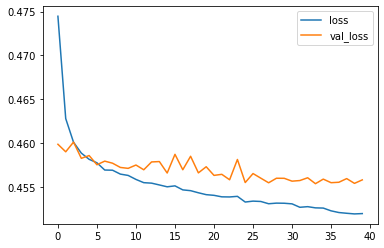

In [47]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [48]:
predictions = model.predict_classes(x_val)
correct_count = (y_val.reshape((y_val.shape[0],1)) == predictions).sum()
print(f'Accuracy is: {correct_count/y_val.shape[0]}')

Accuracy is: 0.8031754533629198


In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.58      0.00      0.00     25739
           1       0.80      1.00      0.89    104951

    accuracy                           0.80    130690
   macro avg       0.69      0.50      0.45    130690
weighted avg       0.76      0.80      0.72    130690

